In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.mobilenet import MobileNet
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import tensorflow as tf
from keras.models import load_model
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
IMAGE_SIZE = [224, 224]
BATCH_SIZE = 8
NUM_EPOCH = 10

train_path = "/content/gdrive/My Drive/app/xray/chest_xray/train"
valid_path = "/content/gdrive/My Drive/app/xray/chest_xray/val"

In [9]:
mobilnet = MobileNet(input_shape=IMAGE_SIZE+[3], weights=None, include_top=False)
#for layer in mobilnet.layers:
#  layer.trainable = False

folders = glob("/content/gdrive/My Drive/app/xray/chest_xray/train/*")

x = Flatten()(mobilnet.output)
prediction  = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=mobilnet.input, outputs=prediction)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
__________

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory(train_path, target_size=(224,224), batch_size=BATCH_SIZE, class_mode='categorical')
valid_set = test_datagen.flow_from_directory(valid_path, target_size=(224,224), batch_size=BATCH_SIZE, class_mode='categorical')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [11]:
r=model.fit_generator(training_set, validation_data=valid_set, epochs=NUM_EPOCH, steps_per_epoch=len(training_set), validation_steps=len(valid_set))

plt.plot(r.history['loss'], label='train_loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig("/content/gdrive/My Drive/app/xray/mobilenet/Lossval_loss2")

plt.plot(r.history['acc'], label='train_acc')
plt.plot(r.history['val_acc'], label='val_acc')
plt.legend()
plt.show()
plt.savefig("/content/gdrive/My Drive/app/xray/mobilenet/Lossval_acc2")

model.save("/content/gdrive/My Drive/app/xray/mobilenet/model_mobilenet2.h5")

Epoch 1/10


ResourceExhaustedError: ignored

Viem Phoi
[[0. 1.]]
0.0
1.0


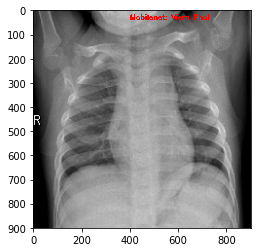

In [0]:
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
import numpy as np
from keras.preprocessing.image import img_to_array
import cv2
import matplotlib.pyplot as plt

model = load_model('/content/gdrive/My Drive/app/xray/mobilenet/model_mobilenet.h5')
#img = image.load_img("/content/gdrive/My Drive/app/xray/chest_xray/val/PNEUMONIA/person1950_bacteria_4881.jpeg", target_size=(224, 224))
#img = image.load_img("/content/gdrive/My Drive/app/xray/chest_xray/val/NORMAL/NORMAL2-IM-1436-0001.jpeg", target_size=(224, 224))

#img = image.load_img("/content/gdrive/My Drive/app/xray/chest_xray/test/PNEUMONIA/person1682_virus_2899.jpeg", target_size=(224, 224))
#img = image.load_img("/content/gdrive/My Drive/app/xray/chest_xray/test/PNEUMONIA/person1629_virus_2823.jpeg", target_size=(224, 224))
#model.summary()
img = image.load_img("/content/gdrive/My Drive/app/xray/chest_xray/train/NORMAL/NORMAL2-IM-1346-0001.jpeg", target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)

numpy_image = np.uint8(img_to_array(img)).copy()
numpy_image = cv2.resize(numpy_image,(900,900))
label = "Binh Thuong" if classes[0][0] == 1 else "Viem Phoi"
cv2.putText(numpy_image, "Mobilenet: {}".format(label) , (400, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)

plt.imshow(numpy_image)
plt.savefig('/content/gdrive/My Drive/app/xray/mobilenet/test2.png')
print(label)
print(classes)
print(classes[0][0])
print(classes[0][1])